In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:xlabel='smoker', ylabel='count'>

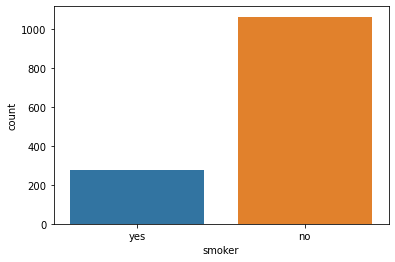

In [4]:
sns.countplot(df["smoker"])

In [5]:
df["smoker"] = df["smoker"].replace({"yes":1, "no": 0})

In [6]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
5,31,female,25.740,0,0,southeast,3756.62160
6,46,female,33.440,1,0,southeast,8240.58960
7,37,female,27.740,3,0,northwest,7281.50560
8,37,male,29.830,2,0,northeast,6406.41070
9,60,female,25.840,0,0,northwest,28923.13692


<AxesSubplot:xlabel='smoker', ylabel='count'>

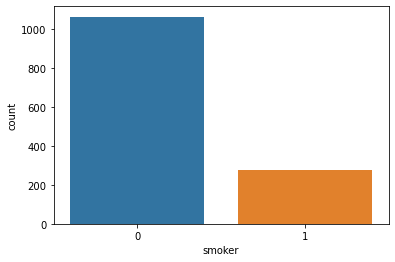

In [7]:
sns.countplot(df["smoker"])

In [8]:
df["charges"].describe().T

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<AxesSubplot:xlabel='charges', ylabel='Density'>

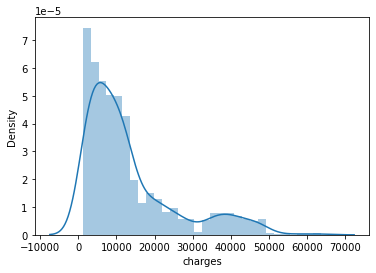

In [9]:
sns.distplot(df["charges"])

In [10]:
df["charges"].mean()

13270.422265141257

In [11]:
df["charges"].median()

9382.033

In [12]:
df["charges"].std()

12110.011236693994

In [13]:
df["charges"].std()/df["charges"].mean()

0.912556585972744

In [14]:
df["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [15]:
new_df = pd.get_dummies(df["region"])

In [16]:
df = pd.concat([df,new_df], axis = 1)

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,male,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,male,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,male,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,male,28.880,0,0,northwest,3866.85520,0,1,0,0


In [18]:
col = ["southwest", "region"]
df = df.drop(col, axis = 1)

In [19]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast
0,19,female,27.900,0,1,16884.92400,0,0,0
1,18,male,33.770,1,0,1725.55230,0,0,1
2,28,male,33.000,3,0,4449.46200,0,0,1
3,33,male,22.705,0,0,21984.47061,0,1,0
4,32,male,28.880,0,0,3866.85520,0,1,0


In [20]:
df["sex"] = df["sex"].replace({"female": 0, "male": 1})

In [21]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast
0,19,0,27.900,0,1,16884.92400,0,0,0
1,18,1,33.770,1,0,1725.55230,0,0,1
2,28,1,33.000,3,0,4449.46200,0,0,1
3,33,1,22.705,0,0,21984.47061,0,1,0
4,32,1,28.880,0,0,3866.85520,0,1,0


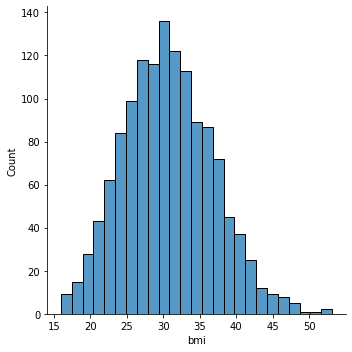

In [22]:
sns.displot(df["bmi"])

In [33]:
df[df["bmi"] > 48]

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast
116,58,1,49.06,0,0,11381.3254,0,0,1
286,46,0,48.07,2,0,9432.9253,1,0,0
847,23,1,50.38,1,0,2438.0552,0,0,1
1047,22,1,52.58,1,1,44501.3982,0,0,1
1317,18,1,53.13,0,0,1163.4627,0,0,1


In [36]:
df = df.drop(df.index[[116,286,847,1047,1317]])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1333 non-null   int64  
 1   sex        1333 non-null   int64  
 2   bmi        1333 non-null   float64
 3   children   1333 non-null   int64  
 4   smoker     1333 non-null   int64  
 5   charges    1333 non-null   float64
 6   northeast  1333 non-null   uint8  
 7   northwest  1333 non-null   uint8  
 8   southeast  1333 non-null   uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 76.8 KB


<AxesSubplot:xlabel='bmi', ylabel='Density'>

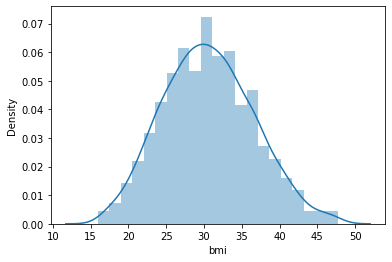

In [38]:
sns.distplot(df["bmi"])

<AxesSubplot:>

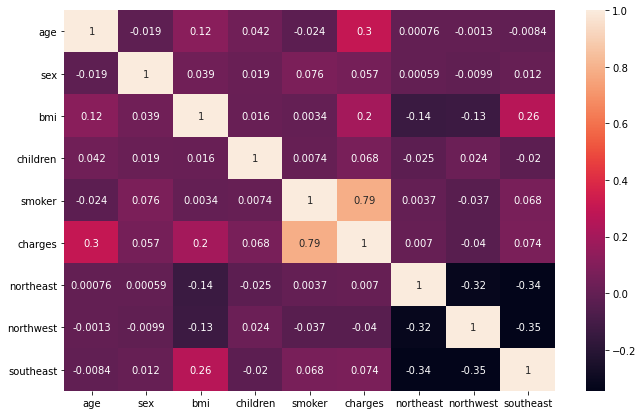

In [41]:
plt.figure(figsize = (11,7))
sns.heatmap(df.corr(), annot = True)

In [43]:
# Independent variables
X = df.drop(["charges"], axis = 1)

In [44]:
# Dependent variables
y = df["charges"]

In [45]:
X

,age,sex,bmi,children,smoker,northeast,northwest,southeast
0,19,0,27.900,0,1,0,0,0
1,18,1,33.770,1,0,0,0,1
2,28,1,33.000,3,0,0,0,1
3,33,1,22.705,0,0,0,1,0
4,32,1,28.880,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0
1334,18,0,31.920,0,0,1,0,0
1335,18,0,36.850,0,0,0,0,1
1336,21,0,25.800,0,0,0,0,0


In [46]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1333, dtype: float64

In [47]:
# Normalization.
df["age"].max()

64

In [48]:
df["age"].min()

18

In [49]:
(19 - 18)/(64-18)

0.021739130434782608

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

In [52]:
independent = pd.DataFrame(scaler.fit_transform(X),columns=X.columns, index=X.index)

In [53]:
independent

,age,sex,bmi,children,smoker,northeast,northwest,southeast
0,0.021739,0.0,0.375708,0.0,1.0,0.0,0.0,0.0
1,0.000000,1.0,0.560415,0.2,0.0,0.0,0.0,1.0
2,0.217391,1.0,0.536186,0.6,0.0,0.0,0.0,1.0
3,0.326087,1.0,0.212240,0.0,0.0,0.0,1.0,0.0
4,0.304348,1.0,0.406545,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1333,0.695652,1.0,0.472310,0.6,0.0,0.0,1.0,0.0
1334,0.000000,0.0,0.502203,0.0,0.0,1.0,0.0,0.0
1335,0.000000,0.0,0.657332,0.0,0.0,0.0,0.0,1.0
1336,0.065217,0.0,0.309629,0.0,0.0,0.0,0.0,0.0


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(independent, y, test_size=0.3, random_state=42)

In [56]:
X_train    # Independent train set

,age,sex,bmi,children,smoker,northeast,northwest,southeast
334,0.543478,0.0,0.621775,0.4,0.0,1.0,0.0,0.0
357,0.630435,1.0,0.436438,0.6,0.0,0.0,1.0,0.0
139,0.086957,0.0,0.630585,0.0,0.0,0.0,0.0,0.0
383,0.369565,0.0,0.861548,0.4,0.0,0.0,0.0,1.0
294,0.152174,1.0,0.341095,0.6,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1099,0.152174,0.0,0.567338,0.2,0.0,0.0,0.0,1.0
1134,0.217391,1.0,0.561989,0.0,0.0,0.0,1.0,0.0
1298,0.326087,1.0,0.361705,0.4,0.0,0.0,1.0,0.0
863,0.391304,0.0,0.122561,0.0,0.0,1.0,0.0,0.0


In [61]:
X_train.shape, y_train.shape

((933, 8), (933,))

In [59]:
X_test.shape, y_test.shape

((400, 8), (400,))

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
linear_reg = LinearRegression()

In [64]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [65]:
prediction = linear_reg.predict(X_test)

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [69]:
mean_squared_error(y_test, prediction)    # MSE

41842694.86394135

In [71]:
import math
from math import sqrt

In [72]:
sqrt(mean_squared_error(y_test, prediction))     # RMSE

6468.59295859164

In [74]:
mean_absolute_error(y_test, prediction)     # MAE

4497.203223636177

In [76]:
r2_score(y_test, prediction)

0.7413307623868319